In [1]:
print_imports()

Loaded modules:
numpy                np              1.14.0
pandas               pd              0.22.0
sklearn              sk              0.19.1
keras                ks              2.1.4

matplotlib           mpl             2.1.2
matplotlib.pyplot    plt             N/A
matplotlib.image     mpimg           N/A
seaborn              sns             0.8.1
PIL                  PIL             5.0.0

ExergyUtilities      exergy          2.0.

pyspark              pyspark         2.2.1


### Imports

In [2]:
import os, re, logging, json
from pprint import pprint

from datetime import datetime
import random
import time

In [3]:
mod_path = r"/home/batman/git/ai_drive/src"
sys.path.append(mod_path)
logging.debug("ADDED TO PATH: ".format(mod_path))

In [13]:
import drive.analysis_offline as analysis
import drive.my_generators as my_generators

### Paths

In [15]:
this_project_path = r"/media/batman/USB STICK"
project_name = r'catdog1'
path_test = r"/home/batman/Dropbox/DATA/cats_dogs_all/test"

### Plotting function

In [6]:
model_title = "10 Epochs"
def plot_hist(history_dict):
    #fig = plt.figure(figsize=(5,4))
    #fig=plt.figure(figsize=(20, 10),facecolor='white')

    #f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5),sharey=False,facecolor='white')
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5),sharey=False,facecolor='0.15')
    
    ax1.plot(history_dict['epoch'],  history_dict['history']['loss'],label="Train")
    ax1.plot(history_dict['epoch'],  history_dict['history']['val_loss'],label="CV")
    ax1.set_title("Loss function development - Training set vs CV set")
    ax1.legend(loc='upper right')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Values')
    
    ax2.plot(history_dict['epoch'],  history_dict['history']['acc'],label="Train")
    ax2.plot(history_dict['epoch'],  history_dict['history']['val_acc'],label="CV")
    ax2.set_title("Accuracy development - Training set vs CV set")
    ax2.legend(loc='upper right')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Values')
    
    plt.suptitle(model_title, fontsize=16)
    
    plt.show()

#plot_hist(history_dict)

```total_params = (filter_height * filter_width * input_image_channels + 1) * number_of_filters```

### Each loaded layer has a summary string

In [7]:
layer_funcs = analysis.LAYER_FUNCS

### Parameter counting

### Main

In [8]:
root_path = os.path.join(this_project_path,project_name)
run_folders = [dir for dir in os.listdir(root_path) if re.match('run',dir)]
run_folders.sort()

# Loop run folders
for rfolder in run_folders:
    this_run_path = os.path.join(root_path,rfolder)
    logging.debug('**** RUN {} ****'.format(rfolder))
    
    ###### Log file ######
    log = analysis.get_log_file(this_run_path)
    print('start;',log['start'])
    print('elapsed; {:.1f}'.format(log['elapsed'].seconds/60))
    print('generator;',log['generator'])
    #raise
    ###### Weights ######
    wts = analysis.get_weights(this_run_path)
    if wts: best_wt = wts[-1] # BEST weight (last weight)
    
    ###### Architecture ######
    model = analysis.load_model(this_run_path)
    arch_dict = analysis.read_model_json(this_run_path)
    
    #model.summary()
    print(analysis.count_params(model))
    
    ##### Reload weights #####
    if wts:
        print(best_wt)
        model.load_weights(best_wt['path'])
    
    #raise
    ###### Loop layers ######
    for i,layer in enumerate(arch_dict['config']):
        layer_str = layer_funcs[layer['class_name']](layer)
        print(i,layer_str)

    ###### History ######
    path_hist = analysis.get_history(this_run_path)    
    with open(path_hist) as hist_file:
        hist_dict = json.load(hist_file)
    print("Epochs",hist_dict['params']['epochs'])
    print("Steps",hist_dict['params']['steps'])
    
    #plot_hist(hist_dict)
    #del model
    raise


root  - 10  - <ipython-input-8-28235b19ae15>  <module>                      : **** RUN run078 ****
start; 2018-03-09 07:29:20
elapsed; 103.9
generator; my_generators         get_train_generator_simple    : Training
root  - 10  - analysis_offline      get_weights                   : Found 25 weights files, total 660 MB = 26.4 MB per file
{'Total': 3453121, 'Trainable': 3453121, 'Non-trainable': 0}
{'epoch': 50, 'fname': 'weights-epoch50-0.91.hdf5', 'path': '/media/batman/USB STICK/catdog1/run078/weights-epoch50-0.91.hdf5', 'size': 26.384925842285156}
0 Conv2D, kernel 3, filters 32
1 MaxPooling2D, pool 2
2 Conv2D, kernel 3, filters 64
3 MaxPooling2D, pool 2
4 Conv2D, kernel 3, filters 128
5 MaxPooling2D, pool 2
6 Conv2D, kernel 3, filters 128
7 MaxPooling2D, pool 2
8 Flatten
9 Dropout, dropout 0.5
10 Dense
11 Dense
/media/batman/USB STICK/catdog1/run078/history run078.txt
Epochs 50
Steps 400.0


RuntimeError: No active exception to reraise

## Test data path and solutions csv

In [16]:
this_project_path = r"/media/batman/USB STICK"
project_name = r'catdog1'
root_path = os.path.join(this_project_path,project_name)
#test_image_paths =  [os.path.join(path_test,i) for i in os.listdir(path_test)]
#print(test_image_paths[0:2])
#print(len(test_image_paths))
#root_path

In [17]:
path_solutions = os.path.join(root_path,"/home/batman/Dropbox/DATA/cats_dogs_all/submission18.csv")
df_solutions = analysis.get_solutions_csv(path_solutions)
df_solutions.head()

root  - 10  - analysis_offline      get_solutions_csv             : Loaded solutions from /home/batman/Dropbox/DATA/cats_dogs_all/submission18.csv, 12500 rows


,label,labelTF
id,,
1,0.99,True
2,0.99,True
3,0.99,True
4,0.99,True
5,0.01,False


## Get a sample of 8 results and predict

In [18]:
#sample = test_generator[0][0][:8]

In [44]:
sample_gen = my_generators.get_test_generator_sample(path_test,8)
sample_gen.shuffle = True
img_list = list()

#print(sample_gen[0][0])
#raise
print(type(sample_gen))
print(len(sample_gen))
sample = sample_gen[0][0]
#print(sample)


predictions = model.predict(sample)
for img in sample:
    img_list.append(img)

predictions = [i[0] for i in predictions]
print(predictions)
for p in predictions:
    break
    print("{:.3f}".format(p))

img_pred_list = list(zip(img_list[0:8],predictions[0:8]))
len(img_pred_list)

Found 12500 images belonging to 1 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
1563
[0.9998084, 0.9999716, 0.9999689, 0.9999999, 0.14676234, 0.99998, 0.9999988, 2.4318426e-06]


8

Plot the sample

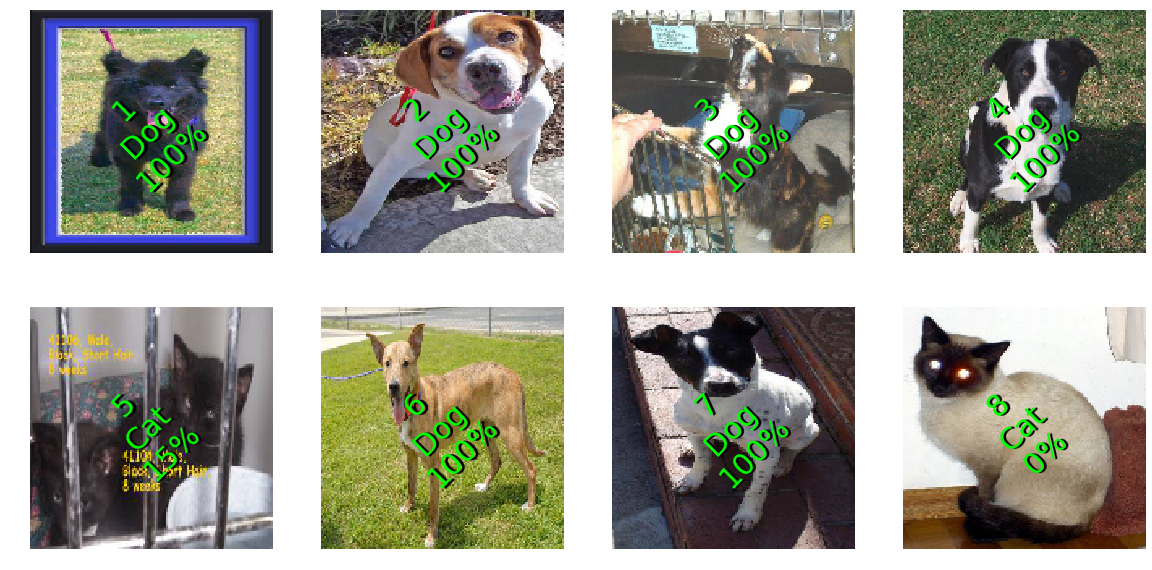

In [45]:
fig=plt.figure(figsize=(20, 10))
columns = 4
rows = 2
predicted_class = None
for i,img_pred in enumerate(img_pred_list):
    i = i+1
    
    img,pred = img_pred

    proba_str = "{:.0f}%".format(pred*100)
    if pred < 0.5:
        predicted_class = 'Cat'
    elif pred >= 0.5:
        predicted_class = 'Dog'
    else:
        raise
    
    
    this_ax = fig.add_subplot(rows, columns, i)

    label_str =  str(i) + '\n' + predicted_class + '\n' + proba_str
    
    plt.text(150/2, 150/2, label_str, {'ha': 'center', 'va': 'center'}, rotation=45,size=30, color='black')
    plt.text(150/2-2, 150/2, label_str, {'ha': 'center', 'va': 'center'}, rotation=45,size=30, color='lime')
    #color : color


    plt.imshow(img)
    plt.axis("off")
plt.show()

## Iterate over the test images

generator

In [ ]:

import keras.preprocessing.image
test_datagen_real = ks.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen_real.flow_from_directory(
        path_test,
        target_size = (150,150),
        batch_size = 500,
        shuffle=False,
        #class_mode = "binary",
    );


In [ ]:
# Data generation constants
num_batches = len(test_generator)
num_files = test_generator.n
batch_size = test_generator.batch_size

# Get filename numbers (indices)
fnames = test_generator.filenames
nums = [re.search('(?P<num>\d+).jpg',f).groups()[0]  for f in fnames]
nums = [int(n)  for n in nums]

In [ ]:
seen_files = 0
test_generator.reset()
predictions_list = list()

t0 = time.time()

for i,batch in enumerate(test_generator):
    # Tally the actual seen images (tensor layers)
    seen_files += batch[0].shape[0]
    
    # Current index
    idx = test_generator.batch_index
    
    # Report
    logging.debug("{} seen {} / {} = {:.1f}%".format(idx,seen_files,num_files,seen_files/num_files*100))

    # Make predictions and append
    predictions = model.predict(batch[0])
    predictions = [i[0] for i in predictions]
    predictions_list += predictions
    
    # Seen all batches, break the loop 
    if i+1 == num_batches:
        break

t1 = time.time()        
logging.debug("Processed {} images in {} batches. Elapsed time: {}}".format(seen_files, num_batches, total = t1-t0))

In [ ]:
assert len(predictions_list) == len(nums)
df_test = pd.DataFrame({'predicted probability':predictions_list},index = nums)
df_test.sort_index(inplace=True)
df_test.head()

In [ ]:
assert len(df_test) == len(df_solutions)
assert (df_test.index == df_solutions.index).all()
df_acc = df_solutions.join(df_test)
df_acc.dtypes
df_acc.head()

Write results

In [ ]:
with open('submission_file.csv','w') as f:
    f.write('id,label\n')
            
with open('submission_file.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num,model_out[1]))

Make a single prediction

In [ ]:

    #img=mpimg.imread(this_img_path)
    
    #img = mpimg.open(this_img_path)
    #img.load()
    
    
    #img = Image.open(this_img_path)
    #img.load()



    
    this_ax = fig.add_subplot(rows, columns, i)

    this_ax.set_title("{} {} {}".format(name, number, img.shape,))
    plt.imshow(img)
    plt.axis("off")
plt.show()

In [ ]:
this_img_path = random.sample(test_image_paths,1)[0]
assert os.path.exists(this_img_path)
fname = os.path.split(this_img_path)[-1]
name, ext = fname.split(".")
num = int(name)

img=mpimg.imread(this_img_path)
#nop = np.array([None])
img = img[np.newaxis]
print(img.shape)
#img = np.append(nop, )
#cd_predict(model,img)
#model.predict(img, verbose=0)
#fit_img = test_datagen.fit(img)
fit_img_gen = test_datagen.flow(img)
for fit_img in fit_img_gen:
    print(fit_img.shape)
    model.predict(fit_img)



Get a sample

In [ ]:
sample = random.sample(test_image_paths,1)
for p in sample:
    print(p)

In [ ]:
def cd_predict(model,img):
    print("making predictions on test set...")
    predictions = model.predict(img, verbose=0)
    return predictions


In [ ]:
model.evaluate(test_data, test_labels_one_hot)

In [ ]:
#import Image
#

color = (17/255,17/255,17/255)


In [ ]:
#model


In [ ]:
predictions = model.predict(test, verbose=0)

In [ ]:
for i in range(0,10):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i][0]))
        
    plt.imshow(test[i].T)
    plt.show()